# Air Traffic Control Problem - Optimal Runway Allocation for Single-Plane Assignments in a Multi-Runway Airport

<div style="display: flex; justify-content: center; gap: 20px;">
    <img src="../../Images_Opt/pexels-saturnus99-9015533.jpg" 
         alt="pexels-saturnus99-9015533" 
         style="width: 300px; height: 200px;">
    <img src="../../Images_Opt/tower_control_room.jpeg" 
         alt="tower" 
         style="width: 400px; height: 200px;">
</div>

- Photo by [Jeffry S.S. on Pexels](https://www.pexels.com/photo/a-passenger-plane-flying-in-the-sky-9015533/)
- Photo from [Forbes](https://www.forbes.com/sites/danielreed/2016/02/05/air-traffic-control-privatization-finally-has-a-realistic-shot-at-being-passed-by-congress/)

<div style="text-align: center">
    <img src = "../../Images_Opt/output_assigned_runways.png" alt="output_assigned_runways" 
    style="width: 675px; height: 450px;">
    <p style="font-size: 16px; font-style: italic; color: gray; margin-top: 5px;">
    </p>
</div>

*The optimized runway schedule efficiently sequences aircraft operations, with Runway 1 managing Plane 1’s landing and taxiing before Plane 4 lands while Plane 3 taxis, allowing Plane 3 to take off immediately after separation; Runway 2 coordinating Plane 6’s taxi and takeoff while Plane 2 approaches and lands, ensuring Plane 8 is positioned for takeoff as soon as Plane 2 clears; and Runway 3 handling Plane 7’s taxi and departure, followed by Plane 5’s landing and Plane 9’s final approach, maintaining continuous runway usage without interference or delays.*

## Abstract

This study presents a quantum-optimized scheduling framework for air traffic control, maximizing runway throughput while ensuring conflict-free sequencing of landings, taxiing, and takeoffs. Simulation results demonstrate optimized multi-runway utilization, where aircraft operations are strategically sequenced to prevent bottlenecks while adhering to FAA wake separation constraints. The scheduling model allows overlapping of non-conflicting phases, such as taxiing and approach, ensuring seamless transitions and minimizing idle runway time. Visualizations highlight how departures and arrivals are structured to maintain continuous runway availability, reducing congestion and enhancing operational efficiency. This quantum-driven scheduling framework offers scalability and real-time adaptability, making it a promising solution for high-density air traffic management. As quantum computing continues to evolve, this approach holds the potential to revolutionize air traffic control, improving global airspace efficiency, reducing delays, and optimizing fuel consumption through smarter, adaptive scheduling strategies. **Applying a quadratic unconstrained binary optimization (QUBO) formulation, the approach natively adapts to quantum computing architectures, using quantum approximate optimization algorithm (QAOA), variational quantum eigensolver (VQE), and quantum annealing to efficiently solve complex ATC scheduling problems.**

## Introduction

Air Traffic Control (ATC) ensures the safe and efficient movement of aircraft in busy airspace. As traffic grows, optimizing runway assignments is crucial for reducing delays and maximizing efficiency. This study explores Optimal Runway Allocation for Single-Plane Assignments in a multi-runway airport, where ATC pre-assigns runways. The challenge is to schedule landings and takeoffs while maintaining safety and efficiency.

## Problem Overview
The problem involves optimizing the scheduling of aircraft across multiple runways to ensure efficient sequencing of landings, taxiing, and takeoffs while adhering to safety constraints; as shown in the table, each runway is pre-assigned specific aircraft in ascending order, requiring a conflict-free and delay-minimized schedule to maximize runway utilization and maintain operational efficiency.

### Detailed Runway and Aircraft Assignments

| Runway  | Plane  | Flight Phase             |
|---------|--------|-------------------------|
| Runway 1 | Plane 1 | Final Approach, Landing, Taxi to Gate |
| Runway 1 | Plane 3 | Taxi to Runway, Takeoff, Departure |
| Runway 1 | Plane 4 | Final Approach, Landing, Taxi to Gate |
| Runway 2 | Plane 2 | Final Approach, Landing, Taxi to Gate |
| Runway 2 | Plane 6 | Taxi to Runway, Takeoff, Departure |
| Runway 2 | Plane 8 | Taxi to Runway, Takeoff, Departure |
| Runway 3 | Plane 5 | Final Approach, Landing, Taxi to Gate |
| Runway 3 | Plane 7 | Taxi to Runway, Takeoff, Departure |
| Runway 3 | Plane 9 | Final Approach, Landing, Taxi to Gate |



## Objectives
1.  Ensure conflict-free operations across runways.
2.  Maintain proper separation for safety.
3.  Minimize total timespan for all operations.
4.  Use optimization techniques (QUBO plus classical solvers) for efficient scheduling.

## Problem Definition 

### Problem 
In our ATC - Optimal Runway Allocation for Single-Plane Assignments in a Multi-Runway Airport porblem, which is essentially a variation of a [Job Shop Scheduling problem](https://arxiv.org/abs/1506.08479v2), where:

1.  We have total of 9 planes $(N)$ waiting to land and takeoff. 
2.  We will write this as a set of $P = \{\text{plane1},\text{plane2},\cdots, \text{plane9}\}$ that must be scheduled on a set of runways $(r)$ where $r \in R = \{ \text{runway1},\text{runway2},\text{runway3} \}$ assigned by ATC.
3.  Each plane must perform landing operations $O$ or takoff operations 
    *   Landing: $\{ \text{Final Approach}\rightarrow\text{Landing}\rightarrow\text{Taxiing to gate}\}$
    *   Takeoff: $\{ \text{Taxiing from gate}\rightarrow\text{takeoff}\rightarrow\text{Departure}\}$
    
    $$
    p_1 = \{ O_{1}\rightarrow \cdots \rightarrow O_{k_1} \}\\
    p_2 = \{ O_{k_{1}+1} \rightarrow \cdots \rightarrow O_{k_2} \}\\
    \vdots\\
    p_N = \{ O_{k_{N-1}+1} \rightarrow \cdots \rightarrow O_{k_N} \}\\
    $$

    given the running index overall opearations $i \in \{1, \cdots, k_N \}$, we let $q_i$ be the index of the plane $p_{q_i}$ responsible for executing operations $O_i$. We define $I_m$ to be the set of indices of all of the operations that have to be executed on plane $p_p$, i.e., $I_m = \{i:q_{i} = m \}$. The execution time of opearation $O_i$ is now simply denoted $p_i$.

Our binary decision variable $x$ and be defined as:

$$
x_{i,t,r} = 
\begin{cases}
1, & \text{operation} \ O_i \ \text{starts at time unit } t \text{ on runway} \ r, \\
0, & \text{otherwise}
\end{cases}
$$

### Constraints
1.  Runway Utilization $({h_1})$ – Only one aircraft can occupy a runway at any given time for takeoff or landing.
2.  Sequential Scheduling $({h_2})$ – An aircraft's next operation cannot begin until the previous one is completed.
3.  Continuous Flight Pattern $({h_3})$ - For any plane, no gap between each flight pattern.
4.  Runway Incursions & Runway Separation $({h_4})$ – Aircraft must adhere to wake turbulence separation.

## Reference

[1]. D. Venturelli, D. Marchand, and G. Rojo, "Quantum Annealing Implementation of Job-Shop Scheduling", [arXiv:1506.08479v2](https://arxiv.org/abs/1506.08479v2).

[2]. dwave-examples/flow-shop-scheduling [dwave-examples/flow-shop-scheduling](https://github.com/dwave-examples/flow-shop-scheduling).

[3]. dwave-examples/job-shop-scheduling [dwave-examples/job-shop-scheduling](https://github.com/dwave-examples/job-shop-scheduling?tab=readme-ov-file).

---

## QUBO Formulation 

Beyond classical algorithms, this notebook explores quantum annealing techniques for Air Traffic Control optimization. The problem is encoded using binary variables (0 and 1). In quantum annealing, the objective is to find the minimum energy state by formulating the problem into a Hamiltonian form ([Ising problem - Wiki](https://en.wikipedia.org/wiki/Ising_model)). The Hamiltonian for this problem is given by:  

$$
H_{T}(\bar{x}) = \alpha h_1({\bar{x}})+ \beta h_2({\bar{x}}) + \gamma h_3({\bar{x}}) + \delta h_4({\bar{x}})
$$

where $\alpha, \beta, \gamma, \delta, \epsilon$ are penalty parameters set to sufficiently large values $(>0)$ to ensure that infeasible solutions do not have lower energy than the ground state(s).  

The goal is to find the minimum possible makespan associated with a given set of operational instances.

In [1]:
# import docplex model
from docplex.mp.model import Model

## Python Implementation

Here, we first define the flights in our air traffic control problem. We consider a single runway and five planes, each with specific operations.

### Flight Operations and flight information
- Landing Flight Patterns:  
  - Final Approach (`Final approach`)  
  - Landing (`Landing`)  
  - Taxi after Landing (`Taxiing to gate`)  

- Takeoff Operations:  
  - Taxi (`Taxiing to runway`)  
  - Takeoff (`Takeoff`)  
  - Departure (`Departure`)  

Each operation is assigned a specific operation time $ p_i $.

Additionally, we define our CPLEX model (`mdl`) and the time horizon (`T`) for optimization.

In [2]:
# Create CPLEX model 
mdl = Model("ACT Hamiltonian")

# Define time horizon (assuming max 12-time units for simplicity)
T = 11 # 12 can have sep > 2, bit it's still ok

In [3]:
# Define airplanes (jobs) with categorized flight patterns (operations)
# These number are not arbitrary, do not reflect to the real scenario. 
operation_schedule = {
    "Plane1":{
        # --- Landing at runway #1
        1: {
            0: {"phase": "Final approach", "time": 2},
            1: {"phase": "Landing", "time": 1},
            2: {"phase": "Taxiing to gate", "time": 3},
        }
    },
    "Plane2":{
        # --- Landing at runway #2
        2: {
            3: {"phase": "Final approach", "time": 3},
            4: {"phase": "Landing", "time": 1},
            5: {"phase": "Taxiing to gate", "time": 2},
        },
    },
    "Plane3":{
        # --- Takeoff at runway #1
        1: {
            6: {"phase": "Taxiing to runway", "time": 4},
            7: {"phase": "Takeoff", "time": 1},
            8: {"phase": "Departure", "time": 2}
        }
    },
    "Plane4":{
        # --- Landing at runway #1
        1:{
            9: {"phase": "Final approach", "time": 2},
            10: {"phase": "Landing", "time": 1},
            11: {"phase": "Taxiing to gate", "time": 3}
        },
    },
    "Plane5":{
        # --- Landing at runway #3
        3: {
            12: {"phase": "Final approach", "time": 4},
            13: {"phase": "Landing", "time": 1},
            14: {"phase": "Taxiing to gate", "time": 3}
        }
    },
    "Plane6":{
        # --- Takeoff at runway #2
        2: {
            15: {"phase": "Taxiing to runway", "time": 5},
            16: {"phase": "Takeoff", "time": 1},
            17: {"phase": "Departure", "time": 2}
        },
    },
    "Plane7":{
        # --- Takeoff at runway #3
        3: {
            18: {"phase": "Taxiing to runway", "time": 5},
            19: {"phase": "Takeoff", "time": 1},
            20: {"phase": "Departure", "time": 2}
        }        
    },
    "Plane8":{
        # --- Takeoff at runway #2
        2: {
            21: {"phase": "Taxiing to runway", "time": 6},
            22: {"phase": "Takeoff", "time": 1},
            23: {"phase": "Departure", "time": 1}
        }        
    },
    "Plane9":{
        # --- Landing at runway #3
        3: {
            24: {"phase": "Final approach", "time": 5},
            25: {"phase": "Landing", "time": 1},
            26: {"phase": "Taxiing to gate", "time": 3}
        }        
    },
}

In [4]:
# Let's recall how to get dictionary element first
for plane in operation_schedule:
    print(f"Plane: {plane}")
    for runway in operation_schedule[plane]:
        print(f" -> Availiable Runway: {runway}")
        for operation in operation_schedule[plane][runway]:
            print(f"  -> operations {operation} " + f"{operation_schedule[plane][runway][operation]}")
            
    

Plane: Plane1
 -> Availiable Runway: 1
  -> operations 0 {'phase': 'Final approach', 'time': 2}
  -> operations 1 {'phase': 'Landing', 'time': 1}
  -> operations 2 {'phase': 'Taxiing to gate', 'time': 3}
Plane: Plane2
 -> Availiable Runway: 2
  -> operations 3 {'phase': 'Final approach', 'time': 3}
  -> operations 4 {'phase': 'Landing', 'time': 1}
  -> operations 5 {'phase': 'Taxiing to gate', 'time': 2}
Plane: Plane3
 -> Availiable Runway: 1
  -> operations 6 {'phase': 'Taxiing to runway', 'time': 4}
  -> operations 7 {'phase': 'Takeoff', 'time': 1}
  -> operations 8 {'phase': 'Departure', 'time': 2}
Plane: Plane4
 -> Availiable Runway: 1
  -> operations 9 {'phase': 'Final approach', 'time': 2}
  -> operations 10 {'phase': 'Landing', 'time': 1}
  -> operations 11 {'phase': 'Taxiing to gate', 'time': 3}
Plane: Plane5
 -> Availiable Runway: 3
  -> operations 12 {'phase': 'Final approach', 'time': 4}
  -> operations 13 {'phase': 'Landing', 'time': 1}
  -> operations 14 {'phase': 'Taxiing

In [5]:
# Define binary variables x[i,t] (1 if operation i starts at time t, 0 otheRwise)
x = {(i,t,runway): mdl.binary_var(name=f"x_{i}_{t}_{runway}") 
     for plane in operation_schedule 
     for runway in operation_schedule[plane] 
     for i in operation_schedule[plane][runway] 
     for t in range(T)}
#print(x)

# Total of T x i length of binary variable
print(f"Total number of binary variables: {len(x)}")

Total number of binary variables: 297


### Hamiltonian QUBO



In this step, we formulate the Quadratic Unconstrained Binary Optimization (QUBO) model for Air Traffic Control using Quantum Annealing.

### Considerations:
- The penalty terms representviolations of constraints.
- These violations are penalized using Hamiltonian parameters.
- Higher violations result in higher energy states, which we aim to minimize.

### QUBO Hamiltonian Formulation:
$$
H_{T}(\bar{x}) = \alpha h_1({\bar{x}})+ \beta h_2({\bar{x}}) + \gamma h_3({\bar{x}}) + \delta h_4({\bar{x}})
$$
where:
- $h_i(\bar{x})$ represents different constraint violations.
- $\alpha, \beta, \gamma, \delta, \epsilon, \zeta$ are penalty parameters ensuring infeasible solutions have higher energy values.

Our objective is to find the optimal solution that minimizes the total Hamiltonian energy, leading to the best scheduling of flights while satisfying all constraints.

### Constraint 1: Runway Utilization $({h_1})$ – Only one aircraft can occupy a runway at any given time for takeoff or landing.

To make sure every opeartions in every plane is executed, We can construct a formula as 

$$
\sum_{i} \sum_{t} x_{i,t,r} = 1, \forall r \in R_\text{assigned runway}
$$

therefore, we can write our penalty term as 

$$
h_1 = \sum_{r} \bigg( \sum_{i} \sum_{t} x_{i,t,r} - 1 \bigg)^{2}
$$


In [6]:
# Constraint 1: Runway Utilization – Only one aircraft can occupy a runway at any given time for takeoff or landing.

h_1 = mdl.sum(
    (mdl.sum(x[i, t, r] 
             for r in operation_schedule[plane] 
             if i in operation_schedule[plane][r]  # Ensure operation i exists on runway r
             for t in range(T)) - 1) ** 2
    for plane in operation_schedule
    for r in operation_schedule[plane] 
    for i in operation_schedule[plane][r]  # Only iterate over valid i for runway r
)

# print h_1
#print(h_1)

### Constraint 2: Sequential Scheduling $({h_2})$ – An aircraft's next operation cannot begin until the previous one is completed.

To enforce the correct sequence of operations within a job, each aircraft (job $n$) must complete operation $O_i$ before starting $O_{i+1}$. To penalize violations of this rule, we introduce a penalty term:

$$
\sum_{k_{n-1}<i<k_{N},\ t+p_{i}>t'} x_{i,t,r} x_{i+1,t',r}, \quad \text{for each plane } (n), \text{ for each runway } (r)
$$

The corresponding penalty function $h_2$ is given by:

$$
h_2 = \sum_{r} \sum_{n} \sum_{k_{n-1}<i<k_{N},\ t+p_{i}>t'} x_{i,t,r} x_{i+1,t',r}
$$

This ensures that no aircraft starts a new operation before completing the previous one.

Here, careful handling of the $i$ indexing is required. Since each job consists of three operations $O_1, O_2, O_3$, we must omit the last operation $O_3$ in each job, as it has no successor. Failing to exclude the last operation may result in out-of-bounds indexing errors.

In [7]:
# Constraint 2: An aircraft's next operation cannot begin until the previous one is completed.
h_2 = mdl.sum(
    x[i,t,r] * x[i+1,t_prime,r]
    for plane in operation_schedule
    for r in operation_schedule[plane] 
    for i in list(operation_schedule[plane][r].keys())[:-1] # Opeartionas with in each job k_{n-1} < i < k_{N}
    for t in range(T)
    for t_prime in range(T)
    if t + operation_schedule[plane][r][i]["time"] > t_prime
)
#print(h_2)

### Constraint 3: Continuous Flight Pattern $({h_3})$ - For any plane, no gap between each flight pattern.

For any plane, there must be no gap between each flight pattern
$$
\sum_{k_{n-1}<i<k_{N},\ t+p_{i}\neq t'} x_{i,t} x_{i+1,t'},\ \text{for each runway ($r$)}
$$
and we can have a penalty term $(h_3)$ of 
$$
h_3 = \sum_{r}\bigg({\sum_{k_{n-1}<i<k_{N},\ t+p_{i} \neq t'} x_{i,t} x_{i+1,t'}}\bigg)
$$

In [8]:
# Constraint 3: For any plane, no gap between each flight pattern.
# To ensure the order of the operations within a job are enforced.
h_3 = mdl.sum(
    x[i,t,r] * x[i+1,t_prime,r]
    for plane in operation_schedule
    for r in operation_schedule[plane] 
    for i in list(operation_schedule[plane][r].keys())[:-1] # Opeartionas with in each job k_{n-1} < i < k_{N}
    for t in range(T)
    for t_prime in range(T)
    if t + operation_schedule[plane][r][i]["time"] != t_prime
)
#print(h_3)

### Constaint 4: Separation Requirements $({h_4})$ – Aircraft must adhere to wake turbulence separation.

For every landing or takeoff phase, we must ensure separation constraints by excluding cases where the next runway usage starts before the required separation time $t_{sep}$. That is,
$$
\sum_{(i,k,k,t')\in R_w}x_{\text{i},t,r} \ x_{\text{k},t',r}, \text{for each runway $r$}
$$
where $ \text{Rw}_m = i_\text{takeoff} \ \cup \ i_\text{landing}$. We can have a penalty term $(h_4)$ of 
$$
h_4 = \sum_{r} \bigg( \sum_{(i,k,k,t')\in R_w}x_{\text{i},t,r} \ x_{\text{k},t',r}\bigg)
$$
where $R_w = \{(i,k,k,t'): I_{m}^{r} \times I_{m}^{r},\ t_\text{landing}+t_{sep} + p_i > t'\}$ $t'$: the next operation starts at time $t'$.

Here is the step by step on how construct this set:

1.  Sum over all runways $(r)$.
2.  Identify all operations $(i, k)$ that require separation (Landing/Takeoff).
3.  Ensure that if i happens at $t$, then $k$ must not start at $t'$ unless $t' ≥ t + t_\text{sep}.$
4.  Penalize cases where two operations are scheduled too closely on the same runway.

In [9]:
# Let's See how to extract operations that using runway (no matter which runway)
Runway = [i 
          for plane in operation_schedule 
          for runway in operation_schedule[plane] 
          for i, operation in operation_schedule[plane][runway].items() if operation["phase"] in ["Landing", "Takeoff"]]
print(Runway)

[1, 4, 7, 10, 13, 16, 19, 22, 25]


In [10]:
# constraint 4: Aircraft must adhere to wake turbulence separation.

# runway must be cleared with at least t_sep = 1 time unit before next landing or taking off
t_sep = 1

Rw = [(i,t,k,t_prime,r)
      for r in {r for plane in operation_schedule for r in operation_schedule[plane]}  # Iterate over unique runways
      for plane1 in operation_schedule
      if r in operation_schedule[plane1]  # Ensure runway exists for this plane
      for i, operation1 in operation_schedule[plane1][r].items() if operation1["phase"] in ["Landing", "Takeoff"]
      for plane2 in operation_schedule  # Compare with all planes, including same-plane conflicts
      if r in operation_schedule[plane2]  # Ensure runway exists for this plane
      for k, operation2 in operation_schedule[plane2][r].items() if operation2["phase"] in ["Landing", "Takeoff"]
      #---
      if i != k 
      for t in range(T)
      for t_prime in range(T) if t_prime < t + operation_schedule[plane1][r][i]["time"] + t_sep # makesure only one plane using the runway at the time
      #---
      ]

# Show runway conflict combinations: no runway separation cases.
#print(f"Runway conflicts cases (i,t,k,t',r):\n{Rw}") 
h_4 = mdl.sum(x[i,t,r] * x[k,t_prime,r] for (i,t,k,t_prime,r) in Rw) 
                      
#print(h_4)


#### Python explanation - What is `python for r in {r for plane in operation_schedule for r in operation_schedule[plane]}`?

This is a essential part for constructing runway sepeartion constraint

```python
for r in {r for plane in operation_schedule for r in operation_schedule[plane]} # Iterate over unique runways
```

-   `{r for plane in operation_schedule for r in operation_schedule[plane]}`:
-   First `for plane in operation_schedule` ->  Iterates over all planes.  
-   Second `for r in operation_schedule[plane]` ->  Extracts all runways used by that plane.  
-   `{}` creates a set, so duplicate runways are automatically removed.

This implementation ensures: 
1.  we process each runway once, no matter how many planes use it.  
2.  Prevents redundant calculations when checking separation constraints.  

### Constructing Hamiltonian 

The resulting classical objective function (Hamiltonian) is given by 
$$
H_{T}(\bar{x}) = \alpha h_1({\bar{x}})+ \beta h_2({\bar{x}}) + \gamma h_3({\bar{x}}) + \delta h_4({\bar{x}})
$$
where $\alpha, \beta, \gamma$, and $\delta$ are penalty parameters that must be set to a large number to $(>0)$ in order to ensure that unfeasible solutions do not have larger a lower energy than the ground state(s).

In [11]:
# Select penalty parameters
alpha = 1.5 # Each operation must be executed once and only once.
beta = .5 # An aircraft's next opeartion cannot begin until the previous one is completed.
gamma = 1.1 # For any plane, no gap between each flight pattern.
delta = .7 # Aircraft must adhere to wake turbulence seperation.

### Establish Hamiltonian and solve it

In [12]:
# Establish Hamiltonian (objective function)
H_T = (alpha * h_1 + beta * h_2 + gamma * h_3 + delta * h_4)
mdl.minimize(H_T)

# Solve model
solution = mdl.solve()

print(solution)

solution for: ACT Hamiltonian
objective: 6.3
status: OPTIMAL_SOLUTION(2)
x_0_0_1=1
x_1_2_1=1
x_2_3_1=1
x_3_4_2=1
x_4_7_2=1
x_5_8_2=1
x_6_2_1=1
x_7_6_1=1
x_8_7_1=1
x_9_2_1=1
x_10_4_1=1
x_11_5_1=1
x_12_3_3=1
x_13_7_3=1
x_14_8_3=1
x_15_0_2=1
x_16_5_2=1
x_17_6_2=1
x_18_0_3=1
x_19_5_3=1
x_20_6_3=1
x_21_3_2=1
x_22_9_2=1
x_23_10_2=1
x_24_4_3=1
x_25_9_3=1
x_26_10_3=1



### Genearte a gantt chart

In [13]:
# Extract solution values
schedule = []
for var in mdl.iter_variables():
    if var.solution_value > 0.5:  # Operation is scheduled
        name_parts = var.name.split("_")  # Example: "x_1_3_1" -> ["x", "1", "3", "1"]
        op_id = int(name_parts[1])  # Operation index
        start_time = int(name_parts[2])  # Start time
        runway = int(name_parts[3])  # Runway
        schedule.append((op_id, start_time,runway))

#print(schedule)


In [14]:
import pandas as pd

# Convert to DataFrame
df = pd.DataFrame(schedule, columns=["Operation", "Start Time", "Runway"])
# Assign duration based on operation_schedule (default to 1 if not found)
df["Duration"] = df["Operation"].apply(lambda op: next(
    (operation_schedule[plane][runway][op]["time"] 
     for plane in operation_schedule 
     for runway in operation_schedule[plane] 
     if op in operation_schedule[plane][runway]), 1))  # Default to 1 if not found

# Assign plane labels
df["Plane"] = df["Operation"].apply(lambda op: next(
    (plane for plane in operation_schedule 
     for runway in operation_schedule[plane] 
     if op in operation_schedule[plane][runway]), "Unknown"))

# Assign runway labels
df["Runway"] = df["Operation"].apply(lambda op: next(
    (runway for plane in operation_schedule 
     for runway in operation_schedule[plane] 
     if op in operation_schedule[plane][runway]), "Unknown"))

# Assign phase labels
df["Phase"] = df["Operation"].apply(lambda op: next(
    (operation_schedule[plane][runway][op]["phase"] 
     for plane in operation_schedule 
     for runway in operation_schedule[plane] 
     if op in operation_schedule[plane][runway]), "Unknown"))

print(df)

    Operation  Start Time  Runway  Duration   Plane              Phase
0           0           0       1         2  Plane1     Final approach
1           1           2       1         1  Plane1            Landing
2           2           3       1         3  Plane1    Taxiing to gate
3           3           4       2         3  Plane2     Final approach
4           4           7       2         1  Plane2            Landing
5           5           8       2         2  Plane2    Taxiing to gate
6           6           2       1         4  Plane3  Taxiing to runway
7           7           6       1         1  Plane3            Takeoff
8           8           7       1         2  Plane3          Departure
9           9           2       1         2  Plane4     Final approach
10         10           4       1         1  Plane4            Landing
11         11           5       1         3  Plane4    Taxiing to gate
12         12           3       3         4  Plane5     Final approach
13    

In [15]:
# Find the earliest Landing or Takeoff start time per plane
df["Primary Start"] = df.apply(lambda row: row["Start Time"] 
                               if row["Phase"] in ["Landing", "Takeoff"] else None, axis=1)

# Fill missing values with the earliest available phase per plane
df["Primary Start"] = df.groupby("Plane")["Primary Start"].transform("min")

# Sort by earliest Landing or Takeoff execution
df = df.sort_values(by=["Primary Start", "Start Time"],ascending=False)

print(df)

    Operation  Start Time  Runway  Duration   Plane              Phase  \
23         23          10       2         1  Plane8          Departure   
26         26          10       3         3  Plane9    Taxiing to gate   
22         22           9       2         1  Plane8            Takeoff   
25         25           9       3         1  Plane9            Landing   
24         24           4       3         5  Plane9     Final approach   
21         21           3       2         6  Plane8  Taxiing to runway   
5           5           8       2         2  Plane2    Taxiing to gate   
14         14           8       3         3  Plane5    Taxiing to gate   
4           4           7       2         1  Plane2            Landing   
13         13           7       3         1  Plane5            Landing   
3           3           4       2         3  Plane2     Final approach   
12         12           3       3         4  Plane5     Final approach   
8           8           7       1     

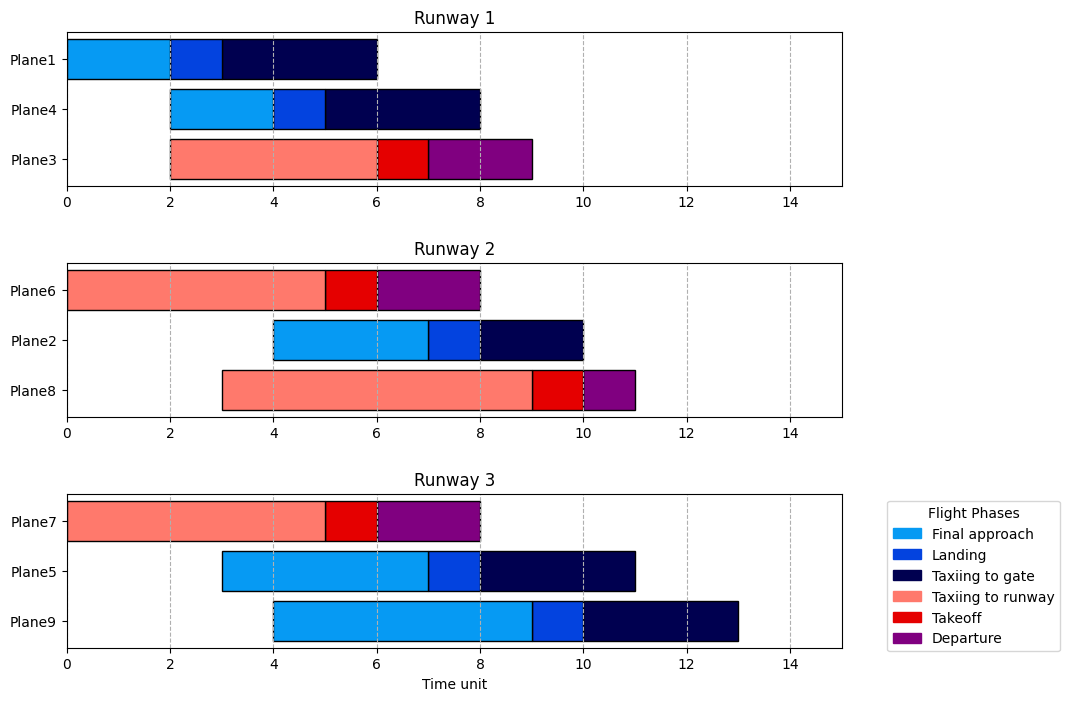

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Colors
# https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def

# Define phase colors
phase_colors = {
    "Final approach": "#069AF3",
    "Landing": "#0343DF",
    "Taxiing to gate": "#000050",
    "Taxiing to runway": "#FF796C",
    "Takeoff": "#E50000",
    "Departure": "purple"
}

# Plot Gantt chart
fig, axes = plt.subplots(3 , 1, figsize=(10, 8)) # len(uniqe runway)

# Increase vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Adjust spacing (increase value for more space)


for idx, runway in enumerate([1, 2, 3]):  # Assuming runways 1, 2, 3
    ax = axes[idx]
    
    # Filter data for this runway
    runway_data = df[df["Runway"] == runway]

    #print(runway_data)  # Debugging: Print runway data

    for i, row in runway_data.iterrows():
        ax.barh(row["Plane"], row["Duration"], left=row["Start Time"], 
                color=phase_colors[row.Phase], edgecolor="black", label=row.Phase if i == 0 else "")

    ax.set_title(f"Runway {runway}")
    ax.grid(axis='x', linestyle="--")
    ax.set_xlim(0, T+4) 
#plt.grid(True)

# Add a legend for phase colors
handles = [plt.Rectangle((0,0),1,1, color=color) for color in phase_colors.values()]
labels = list(phase_colors.keys())
plt.legend(handles, labels, title="Flight Phases", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel("Time unit")
#plt.tight_layout()
plt.show()


## Summary

The optimized scheduling of aircraft operations across three runways ensures a smooth, conflict-free sequence of landings, taxiing, takeoffs, and departures. This structured plan keeps operations efficient and delay-free, following FAA wake separation constraints while maximizing runway utilization.

Runway 1 Operations:
-   Plane 1 begins its final approach, lands, and taxis to the gate.
-   Plane 4 starts its approach simultaneously with Plane 3 taxiing to the runway. Since taxiing takes longer, Plane 4 is able to land, complete its rollout, and taxi to the gate before Plane 3 is ready for takeoff.
-   Plane 3, after completing its taxi, takes off immediately after the required separation time from Plane 4’s landing, ensuring continuous runway usage without interference.

Runway 2 Operations:
-   Plane 6 starts by taxiing to the runway, preparing for takeoff.
-   While Plane 6 is taxiing, Plane 2 is already in its final approach phase, meaning that as soon as Plane 6 departs, the runway is cleared in time for Plane 2 to land after the required separation time.
-   Meanwhile, Plane 8 begins taxiing to the runway even before Plane 2 enters its final approach, ensuring that as soon as Plane 2 lands and clears the runway, Plane 8 is already positioned for takeoff.

Runway 3 Operations:
-   Plane 7 begins with taxiing to the runway, followed by takeoff and departure. This ensures the runway is clear for incoming aircraft.
-   Plane 5 starts its final approach while Plane 7 is departing, allowing for an efficient transition.
-   Plane 9 follows next, entering its final approach after Plane 5 has safely landed. It then proceeds to land and taxi to the gate, ensuring continuous runway usage without delays.

**In sum, this jupyter demo maximizes runway throughput by allowing operations to start simultaneously without direct overlap, ensuring that each aircraft completes its phase without delay or interference. The integration of landing, taxiing, and takeoff sequences prevents runway idle time and minimizes unnecessary waiting.**

## Final thought

## Importance of this demo

Here are some of the benefits of applying this methodology in the future can help reshape the aerospace industry. Every one of these are cirtical to everybody's safety and satisfaction. I am looking forward such implementation can benefit all human beings which makes our travel more safer and more efficient.

1. Enhanced Air Traffic Control (ATC) Focus on Ground and Air Maneuvering – By automating runway scheduling, controllers can dedicate more attention to managing aircraft movement on the ground and in the air, reducing workload and improving response times.  

2. Ensuring Runway Safety and Preventing Incursions – Optimized scheduling minimizes the risk of runway incursions by structuring takeoff and landing sequences, ensuring no two aircraft attempt to occupy the same runway simultaneously.  

3. Improved Aircraft-Specific Attention – With a clear, optimized schedule, ATC can focus on individual aircraft operations, reducing errors and ensuring safer and more efficient sequencing.  

4. Maximizing Aircraft Utilization – Efficient scheduling reduces aircraft idle time, leading to faster turnarounds, lower operational costs, and improved fleet efficiency.  

5. Scalability for High-Density Air Traffic – Unlike classical algorithms, which struggle with the complexity of large-scale scheduling, quantum-based approaches can efficiently handle multiple runways, aircraft, and constraints simultaneously.  

6. Fuel and Emissions Reduction – By minimizing holding patterns and excessive taxiing, optimized schedules lower fuel consumption, contributing to cost savings and environmental sustainability.  

7. Improved Passenger Experience – More efficient scheduling reduces delays, prevents bottlenecks, and enhances airline reliability, leading to better overall airport operations and customer satisfaction.

## Future Scalability and Enhancements of Quantum world



Future Scalability and Enhancements
As quantum computing power continues to advance and becomes more accessible, the potential for optimizing air traffic control (ATC) scheduling will significantly expand. With increased computational capacity, larger and more complex scheduling scenarios can be handled efficiently, making quantum algorithms even more impactful in real-world air traffic management.

1. Scaling Up to Larger Air Traffic Scenarios
Currently, quantum optimization is applied to a multi-runway airport with a limited number of aircraft. As quantum hardware improves, we can scale this model to handle large international airports with hundreds of flights arriving and departing simultaneously. This would allow for real-time scheduling adjustments and enhanced optimization for high-density airspaces.

2. Expanding Flight Phases for More Detailed Scheduling
With greater computational power, we can expand beyond just runway operations and incorporate more detailed flight phases into the scheduling model. These may include:
    -   Baseleg and Downwind – Managing sequencing before final approach.
    -   Climb Phase – Optimizing the transition between takeoff and en-route flight.
    -   Approach/Departure (TRACON) – Controls aircraft arriving/departing within 30-50 miles of the airport.

3. Real-Time Adaptive Scheduling for Dynamic Environments
As quantum computing becomes faster and more robust, the system can process real-time air traffic fluctuations, adjusting flight schedules dynamically in response to:

    -   Weather disruptions
    -   Emergency landings
    -   Last-minute aircraft rerouting
    -   Unexpected delays in takeoff or taxiing
 
In short, as quantum computing technology progresses, the ability to handle larger scheduling problems and more detailed flight phases will revolutionize ATC efficiency. The integration of pre-ATC flight phases (baseleg, downwind, climb) and real-time scheduling will push quantum-based ATC optimization toward fully scalable, dynamic air traffic management systems. This will enhance airport throughput, reduce airspace congestion, and improve global air travel efficiency in the near future.

## Version Information

In [17]:
import sys
import platform
import qiskit
import docplex
import qiskit_optimization
import qiskit_algorithms

print("="*10 + " Version Information " + "="*10)
print(f"Python              : {sys.version}")
print(f"Operating System    : {platform.system()} {platform.release()} ({platform.architecture()[0]})")
print("="*41)
print(f"Qiskit              : {qiskit.__version__}")
print(f"qiskit_optimization : {qiskit_optimization.__version__} ")
print(f"qiskit_algorithms   : {qiskit_algorithms.__version__} ")
print(f"Cplex               : {docplex.__version__}")
print("="*41)


========== Version Information ==========
Python              : 3.11.11 (main, Dec 11 2024, 10:28:39) [Clang 14.0.6 ]
Operating System    : Darwin 24.3.0 (64bit)
Qiskit              : 1.3.2
qiskit_optimization : 0.6.1 
qiskit_algorithms   : 0.3.1 
Cplex               : 2.29.241
